# Introduction to DEA Landsat surface reflectance

**Background:** Surface reflectance products from three Landsat satellites (**Landsat 5, 7 and 8**) are available for access through Geoscience Australia's Digital Earth Australia (DEA). This document includes a short introduction to the Landsat program, and describes the surface reflectance product suite (**NBAR and NBAR-T**) available through DEA. The code snippets in this doc will retrieve, modify and plot the data for `ls*_nbar_albers` and `ls*_nbart_albers`, where `*` is 5, 7 or 8 denote the satellite.

**What does this document do?**

- Show how to use datacube to retrieve Landsat data for various temporal and spatial extents
- Plot individual Landsat bands
- Plot multiple Landsat bands as a true colour image
- Plot multiple Landsat bands as a false colour image
- Demonstrate how to compute and plot simple remote sensing band indices

**Requirements**

You need to run the following commands from the command line prior to launching jupyter notebooks from the same terminal so that the required libraries and paths are set:

`module use /g/data/v10/public/modules/modulefiles` 

`module load dea`

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository [README](https://github.com/GeoscienceAustralia/dea-notebooks/blob/master/README.rst) for instructions on creating a Pull request).

**Date**: August 2018

**Authors**: Robbi Bishop-Taylor, Arapaut Sivaprasad, Claire Krause, Bex Dunn

## About Landsat 

"Landsat represents the world's longest continuously acquired collection of space-based moderate-resolution land remote sensing data. Four decades of imagery provides a unique resource for those who work in agriculture, geology, forestry, regional planning, education, mapping, and global change research. Landsat images are also invaluable for emergency response and disaster relief." [[1](#References)] 

"In the mid-1960s an ambitious effort to develop and launch the first civilian Earth observation satellite was started. The goal was achieved on July 23, 1972, with the launch of the Earth Resources Technology Satellite (ERTS-1), which was later renamed Landsat 1. The launches of Landsat 2, Landsat 3, and Landsat 4 followed in 1975, 1978, and 1982, respectively. When Landsat 5 was launched in 1984, no one could have predicted that the satellite would continue to deliver high quality, global data of Earth's land surfaces for 28 years and 10 months until its retirement in June, 2013. Landsat 6, however, failed to achieve orbit in 1993. Landsat 7 was successfully launched in 1999 and, along with Landsat 8 launched in 2013, continues to provide daily global data. Landsat 9 is planned to be launched in late 2020." [[2](#References)]

![Fig 1. Time-line of the working lives of Landsats since 1972](../Supplementary_data/Images/TimelineOnlyForWebRGB.jpg)


### Basic details about Landsat 5 to 9 [[3](#References)][[4](#References)][[5](#References)][[6](#References)][[7](#References)]

![Fig 2. Basic details about the Landsats](../Supplementary_data/Images/landsats.jpg)


## Digital Earth Australia's Landsat archive

GA has acquired Landsat imagery over Australia since 1979, including TM, ETM+ and OLI imagery. While this data has been used extensively for numerous land and coastal mapping studies, its utility for accurate monitoring of environmental resources has been limited by the processing methods that have been traditionally used to correct for inherent geometric and radiometric distortions in EO imagery. To improve access to Australia's archive of Landsat TM/ETM+/OLI data, GA has collaboratively developed an integrated approach to image data correction that incorporates normalising models to account for atmospheric effects, BRDF and topographic shading.

The approach has been applied to Landsat TM/ETM+ and OLI imagery to create two surface reflectance products: **NBAR** and **NBAR-T**. [[9](#References)]

## Landsat surface reflectance products 

The NBAR and NBAR-T surface reflectance product suite provides standardised optical surface reflectance datasets using robust physical models to correct for variations in image radiance values due to atmospheric properties, and sun and sensor geometry. The resulting stack of surface reflectance grids are consistent over space and time which is instrumental in identifying and quantifying environmental change. Surface reflectance is based on radiance data from the Landsat-5 TM, Landsat-7 ETM+ and Landsat-8 OLI/TIRS sensors. [[9](#References)]

**NBAR** 

NBAR stands for Nadir-corrected BRDF Adjusted Reflectance, where BRDF stands for Bidirectional Reflectance Distribution Function. The approach involves atmospheric correction to compute surface-leaving radiance, and bi-directional reflectance modelling to remove the effects of topography and angular variation in reflectance.

* The standardised NBAR product delivers calibrated optical surface reflectance data across land and coastal fringes. NBAR is a medium resolution (~25 m) grid based on the Landsat TM/ETM+/OLI archive and presents surface reflectance data in **25 square metre grid cells** in the **Australian Albers Equal Area (EPSG:3577)** projection system.
* Radiance measurements from Earth Observation (EO) sensors do not directly quantify the surface reflectance of the Earth. Such measurements are modified by variations in atmospheric properties, sun position, sensor view angle, surface slope and surface aspect. To obtain consistent and comparable measures of Earth surface reflectance from EO, these variations need to be reduced or removed from the radiance measurements. This is especially important when comparing imagery acquired in different seasons and geographic regions.
* NBAR surface reflectance is created using a physics-based, coupled BRDF and atmospheric correction model that can be applied to both flat and inclined surfaces. The resulting surface reflectance values are comparable both within individual images and between images acquired at different times and/or with different sensors. [[9](#References)]

**NBAR-T**

Surface reflectance NBAR-T includes a terrain illumination reflectance correction and has the same features of NBAR, along with some additional features.

* The surface reflectance product is created using a physics-based coupled BRDF and atmospheric correction model that can be applied to both flat and inclined surfaces. The resulting surface reflectance values are comparable both within individual images and between images acquired at different times and/or with different sensors.
* Terrain affects optical satellite images through both irradiance and bidirectional reflectance distribution function (BRDF) effects.
Slopes facing the sun receive enhanced solar irradiance and appear brighter compared to those facing away from the sun.
* For anisotropic surfaces, the radiance received at the satellite sensor from a sloping surface is also affected by surface BRDF which varies with combinations of surface landcover types, sun, and satellite geometry (sun and sensor view, and their relative azimuth angle) as well as topographic geometry (primarily slope and aspect angles). Consequently, to obtain comparable surface reflectance from satellite images covering mountainous areas, it is necessary to process the images to reduce or remove the topographic effect so that the images can be used for different purposes on the same spectral base.
* A Digital Surface Model (DSM) resolution appropriate to the scale of the resolution of satellite image is needed for the best results. 1 second SRTM DSM is used for NBAR-T processing. [[9](#References)]


### Nodata value 

Both NBAR and NBAR-T data contains **nodata pixels**, represented as `-999` values. For NBAR these values can represent pixels outside the observed area (e.g. along the edges of Landsat satellite paths), while in NBAR-T `-999` values can also indicate areas of deep terrain shadow. These values should be converted to a `NaN` value before using this data to avoid treating it as a valid value. [[9](#References)]

### Available bands
The sensors on the Landsats are different and collect reflected radiance in various spectral wavelengths. These are called bands. Details about the bands for satellites 5, 7 and 8 can be found at [[3](#References)], [[5](#References)] and [[6](#References)], respectively. The following bands are included in the DEA archive: band names to be used in code, when retrieving the data, are given in brackets.

- **Landsat 5 and 7:**
    - Excludes Landsat 5 Thematic Mapper (TM) thermal band and Multispectral Scanner (MSS) bands, and Landsat 7 Enhanced Thematic Mapper Plus (ETM+) thermal band and panchromatic band    
    - Includes the following Landsat 5 TM and Landsat 7 ETM+ bands:  
        - Band 1: blue (`blue`)
        - Band 2: green (`green`)
        - Band 3: red (`red`)
        - Band 4: near-infrared (`nir`)
        - Band 5: shortwave infrared 1 (`swir1`)
        - Band 7: shortwave infrared 2 (`swir2`)
- **Landsat 8:**
    - Excludes the Operational Land Imager (OLI) panchromatic or cirrus bands, and Thermal Infrared Sensor (TIRS) bands
    - Includes the following Operational Land Imager (OLI) bands:
        - Band 1: coastal aerosol (`coastal_aerosol`)         
        - Band 2: blue (`blue`)
        - Band 3: green (`green`)
        - Band 4: red (`red`)
        - Band 5: near-infrared (`nir`)
        - Band 6: shortwave infrared 1 (`swir1`)
        - Band 7: shortwave infrared 2 (`swir2`)




### Landsat 7 Scan Line Corrector failure

"The Scan Line Corrector (SLC) is an electro-optical mechanism composed of two parallel mirrors set at an angle on a shaft. The SLC is positioned behind the primary optics and compensates for the along-track motion of the spacecraft occurring during an active SMA cross-track scan. As a result, a rectilinear scan pattern is produced using the SLC instead of the zigzag pattern that would be produced without it. The SLC failed for Landsat 7 on May 31, 2003. Without an operating SLC, the ETM+ line of sight now traces a zig-zag pattern along the satellite ground track (see the figure above) resulting in wedge shaped scan-to-scan gaps (and alternating overlap areas) which increase in magnitude away from nadir. Despite the SLC failure, Landsat 7 ETM+ is still capable of acquiring useful image data with the SLC turned off (SLC-off), particularly within the central portion of any given scene." [[8](#References)]

The top panel in the figure below shows how Landat 7 imagery appears prior to the May 31 2003 SLC failure (i.e. Landsat 7 SLC-on). The bottom panel shows the same area after the SLC failed (i.e. Landsat 7 SLC-off), with obvious diagonal striping that covers approximately 22% of the scene. This striping will be present in all post-May 31 2003 `ls7_nbar_albers` and `ls7_nbart_albers` data in the DEA archive. For certain applications, it may be best to completely exclude post post-May 31 2003 imagery from analyses.

![Figure 3. Scan line corrected image.](../Supplementary_data/Images/SLC_comparison.jpg)

## Retrieving Landsat data
The following code demonstrates how to import Landsat data using DEA, plot the data, and perform simple analyses (i.e. generating remote sensing band indices).

### Import modules

In [13]:
# %matplotlib inline
import sys
import warnings
import datacube
import matplotlib.pyplot as plt
from datacube.storage import masking


### Available Landsat products
The `list_products` method in the Datacube class displays the names and details of all available products. For example, `ls7_nbar_albers` provides NBAR surface reflectance data generated using Landsat 7 imagery:

In [14]:
# Connect to a datacube
dc = datacube.Datacube(app='Intro to Landsat')

# List metadata for all Landsat NBAR and NBART products available in DEA
dc_products = dc.list_products()
display_columns = ['name', 'description', 'product_type', 'crs', 'resolution', 'spatial_dimensions']
dc_products[dc_products['name'].str.contains("nbar_albers|nbart_albers")][display_columns].set_index('name')

,description,product_type,crs,resolution,spatial_dimensions
name,,,,,
ls5_nbar_albers,"Landsat 5 Surface Reflectance NBAR 25 metre, 1...",nbar,EPSG:3577,"(-25, 25)","(y, x)"
ls5_nbart_albers,"Landsat 5 Surface Reflectance NBART 25 metre, ...",nbart,EPSG:3577,"(-25, 25)","(y, x)"
ls7_nbar_albers,"Landsat 7 Surface Reflectance NBAR 25 metre, 1...",nbar,EPSG:3577,"(-25, 25)","(y, x)"
ls7_nbart_albers,"Landsat 7 Surface Reflectance NBART 25 metre, ...",nbart,EPSG:3577,"(-25, 25)","(y, x)"
ls8_nbar_albers,"Landsat 8 Surface Reflectance NBAR 25 metre, 1...",nbar,EPSG:3577,"(-25, 25)","(y, x)"
ls8_nbart_albers,"Landsat 8 Surface Relfectance NBART 25 metre, ...",nbart,EPSG:3577,"(-25, 25)","(y, x)"


### Specify a *query* with coordinates and date range

- **lat/lon:** Latitude and longitude of the area. e.g. Canberra = `'lat': (-35.25, -35.35), 'lon': (149.05, 149.17)`
- **time:** Date range to fetch the scenes. The approximate time between two scenes is 16 days. If there is a location near a swath boundary, it may be captured in two passes and so there could be two images within the 16 day period.
    - You must know [the date(s) for which data is available](https://data.dea.gadevs.ga/ls7_nbar_scene) for each satellite/product, so that the query can be specified correctly. 

In [28]:
# Define temporal and spatial extents to pass to `dc.load` for the data extraction:
query = {'lat': (-33.45, -33.55),
         'lon': (151.25, 151.37),
         'time':('2015-01-01', '2017-01-15')}

### Load Landsat data
In this example we will load NBAR-T data from the Landsat 8 satellite. Sometimes multiple scenes are acquired by the satellite on the same day. We want to group these together, and will use `group_by='solar_day'` to do this. To load in the data, we use our query above to provide a spatial and temporal extraction range.

`dc.load` returns an **xarray** object, which has two core data structures:

- `DataArray` is a labeled, N-dimensional array. 
- `Dataset` is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions.

The available Landsat bands are listed under `Data variables`. Surface reflectance values for each of the Landsat bands are expressed as **16-bit integers scaled between 0 and 10000.**

In [29]:
# Load data for the specified query extent using `dc.load`:
ds = dc.load(product='ls8_nbar_albers', group_by='solar_day', **query)
ds

<xarray.Dataset>
Dimensions:          (time: 47, x: 507, y: 509)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-11T23:43:45.500000 ... 2016-12-31T23:43:56
  * y                (y) float64 -3.783e+06 -3.783e+06 ... -3.796e+06 -3.796e+06
  * x                (x) float64 1.77e+06 1.77e+06 ... 1.783e+06 1.783e+06
Data variables:
    coastal_aerosol  (time, y, x) int16 4870 4960 4964 4972 ... 6267 6299 6199
    blue             (time, y, x) int16 4557 4652 4643 4644 ... 5946 5961 5931
    green            (time, y, x) int16 4410 4471 4476 4466 ... 5899 5988 5881
    red              (time, y, x) int16 4355 4430 4426 4418 ... 5872 5935 5791
    nir              (time, y, x) int16 5087 5119 5114 5106 ... 6013 6041 5909
    swir1            (time, y, x) int16 3265 3300 3333 3338 ... 4014 4174 4172
    swir2            (time, y, x) int16 2198 2267 2316 2337 ... 3009 3161 3097
Attributes:
    crs:      EPSG:3577

### Remove nodata values
It is essential to remove `-999` nodata values prior to analysing or plotting Landsat imagery. You can do with by setting all nodata values to `NaN` using the `mask_invalid_data` function:

In [30]:
# Set all nodata pixels to `NaN`:
ds = masking.mask_invalid_data(ds)

## Plotting Landsat data

### Plot single Landsat bands 
Xarray objects contain built-in methods for plotting single bands. For example, we can plot the Landsat 8 `nir` (near-infrared) band for each timestep:

/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


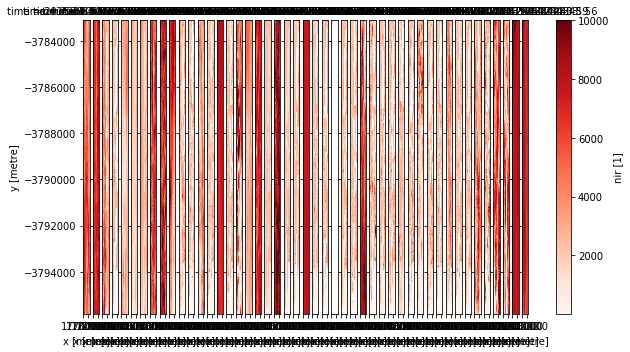

In [31]:
# Make a plot with one column for each time-step:
ds.nir.plot(col='time', figsize=(10, 5), cmap = 'Reds');  # This also works: ds['nir'].plot(col='time')

### Creating a 'true colour' image using three bands
We can also plot combinations of multiple bands as a colour RGB image by converting the xarray dataset to a three band data array, using `.isel(time=1)` to pull out a single time-step to plot, then using the `.plot.imshow` method to plot.

By specifying the `red`, `green` and `blue` bands, we can produce a ['true colour' plot](https://crisp.nus.edu.sg/~research/tutorial/opt_int.htm) that approximates how the landscape would appear to the human eye. Note however that below we use the `robust=True` argument to remove extreme values and result in a colour-enhanced image:

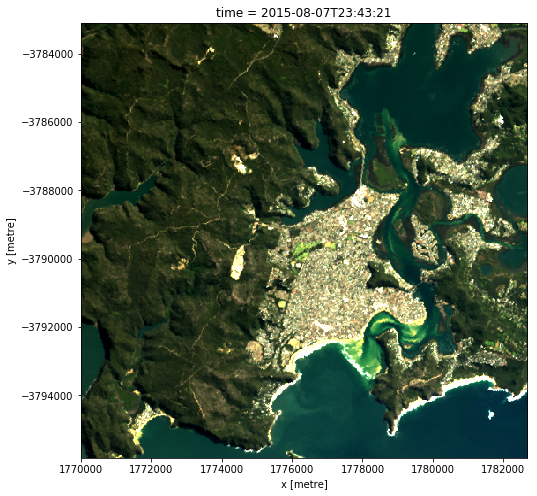

In [50]:
ds[['red', 'green', 'blue']].isel(time=13).to_array().plot.imshow(robust=True, figsize=(8, 8))

### Creating a 'false colour' image using three bands
This plot uses the SWIR and NIR bands to accentuate the presence of water or vegetation in the landscape:

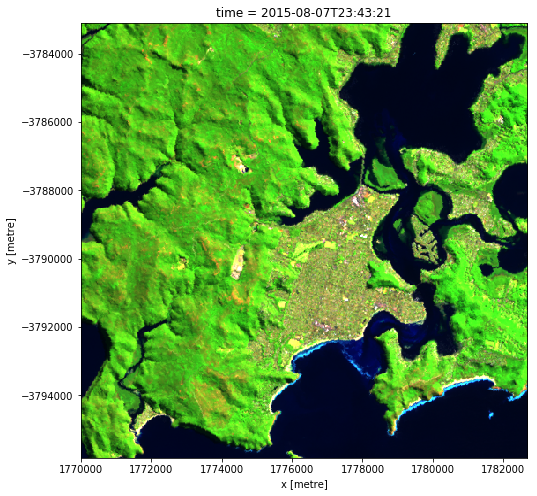

In [51]:
ds[['swir1', 'nir', 'green']].isel(time=13).to_array().plot.imshow(robust=True, figsize=(8, 8))

## Computing band indices

Bands from Landsat surface reflectance products can be combined to compute simple remote sensing indices that provide insights into different aspects of the observed landscape. For example, we can calculate the Normalized Difference Water Index (NDWI), which has high values where a pixel is likely to be open water (e.g. NDWI > 0, or red colours below):

In [52]:
# Compute NDWI using the formula (green - nir) / (green + nir). This will calculate 
# NDWI for every time-step in the dataset:
ds_ndwi = (ds.green - ds.nir) / (ds.green + ds.nir)
ds_ndwi 

<xarray.DataArray (time: 47, y: 509, x: 507)>
array([[[-0.071286, -0.06757 , ..., -0.052524, -0.048368],
        [-0.069009, -0.06436 , ..., -0.05792 , -0.051913],
        ...,
        [-0.048481, -0.041479, ..., -0.00504 , -0.001693],
        [-0.04382 , -0.040656, ..., -0.006151, -0.007148]],

       [[-0.049712, -0.046692, ..., -0.028356, -0.029321],
        [-0.049861, -0.049678, ..., -0.027847, -0.029263],
        ...,
        [-0.016494, -0.019031, ..., -0.008483, -0.005517],
        [-0.017615, -0.019511, ..., -0.007638, -0.008402]],

       ...,

       [[ 0.      , -0.002959, ..., -0.004899, -0.004157],
        [-0.001101, -0.005581, ..., -0.00465 , -0.005084],
        ...,
        [-0.007867, -0.007526, ..., -0.004665, -0.003911],
        [-0.007714, -0.007302, ..., -0.004724, -0.004095]],

       [[-0.017066, -0.017716, ..., -0.012332, -0.011538],
        [-0.018255, -0.018832, ..., -0.012425, -0.012202],
        ...,
        [-0.024052, -0.02426 , ..., -0.008378, -0.008389]

In [53]:
# We can now add this back into our dataset as a new data variable:
ds["NDWI"] = ds_ndwi
ds

<xarray.Dataset>
Dimensions:          (time: 47, x: 507, y: 509)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-11T23:43:45.500000 ... 2016-12-31T23:43:56
  * y                (y) float64 -3.783e+06 -3.783e+06 ... -3.796e+06 -3.796e+06
  * x                (x) float64 1.77e+06 1.77e+06 ... 1.783e+06 1.783e+06
Data variables:
    coastal_aerosol  (time, y, x) float64 4.87e+03 4.96e+03 ... 6.199e+03
    blue             (time, y, x) float64 4.557e+03 4.652e+03 ... 5.931e+03
    green            (time, y, x) float64 4.41e+03 4.471e+03 ... 5.881e+03
    red              (time, y, x) float64 4.355e+03 4.43e+03 ... 5.791e+03
    nir              (time, y, x) float64 5.087e+03 5.119e+03 ... 5.909e+03
    swir1            (time, y, x) float64 3.265e+03 3.3e+03 ... 4.172e+03
    swir2            (time, y, x) float64 2.198e+03 2.267e+03 ... 3.097e+03
    NDWI             (time, y, x) float64 -0.07129 -0.06757 ... -0.002375
Attributes:
    crs:      EPSG:3577

### Plotting a single data variable or band
Newly created data variables (like `NDWI` above) can be plotted in exactly the same way as individual Landsat bands:

/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


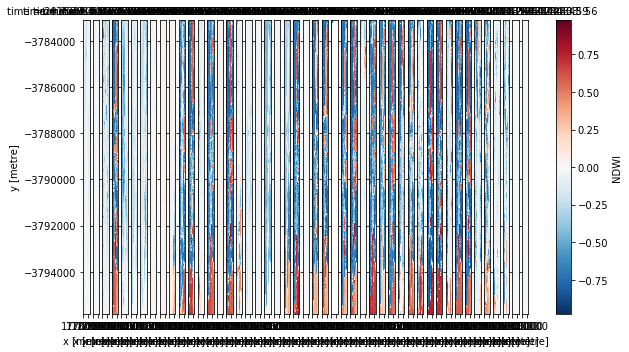

In [54]:
# First, we select the variable we want ('NDWI'), and then make a 
# plot with one column for each time-step:
ds.NDWI.plot(col='time', figsize=(10, 5)); 

There are thousands of different band indices available; for example, the Normalized Difference Vegetation Index (NDVI) which has high values for pixels containing vegetation:

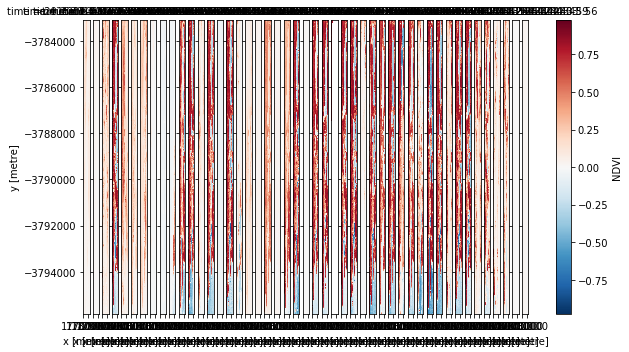

In [55]:
# Compute NDVI using the formula (nir - red) / (nir + red)
ds_ndvi = (ds.nir - ds.red) / (ds.nir + ds.red)

# Add this back into our dataset as a new data variable:
ds["NDVI"] = ds_ndvi

# Plot:
ds.NDVI.plot(col='time', figsize=(10, 5));

## Cloud masking with Landsat pixel quality (PQ25)
You will observe above that the first timestep is affected by thick cloud that covers the majority of the image. Understanding where unclear pixels like these are in an image and then removing or dealing with them is a vital part of using any earth observation dataset like NBAR or NBAR-T surface reflectance. 

Please refer to the [Introduction_to_LandsatPQ](https://github.com/GeoscienceAustralia/dea-notebooks/blob/master/02_DEA_datasets/Introduction_to_LandsatPQ.ipynb) for information on how to clean and analyse Landsat data by accounting for pixel quality.

### References

1. USGS, 2018a. *Landsat Project Description | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm. <https://landsat.usgs.gov/landsat-project-description>
2. USGS, 2018b. *Landsat Missions Timeline | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-missions-timeline>
3. USGS, 2018c. *Landsat 5 History | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-5-history>
4. USGS, 2018d. *Landsat 6 History | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-6-history>
5. USGS, 2018e. *Landsat 7 | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-7-history>
6. USGS, 2018f. *Landsat 8 | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-8-mission>
7. USGS, 2018g. *Landsat 9 | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-9-mission>
8. USGS, 2018h. *Landsat 7 Data Users Handbook - Section 2 | Landsat Missions*, Page Last Modified: 04/25/18 01:57 pm <https://landsat.usgs.gov/landsat-7-data-users-handbook-section-2>
9. GA, 2017. *Surface Reflectance &mdash; Digital Earth Australia 1.0.0 documentation* <http://geoscienceaustralia.github.io/digitalearthau/data/data.html>

